In [40]:
import matplotlib.pyplot as plt
import numpy as np

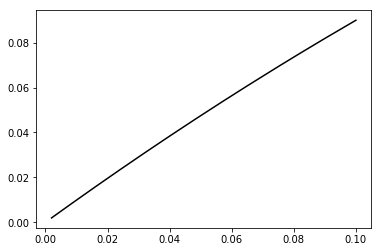

In [38]:
xo = 0.1
r = 1
dp = {}
def x(t):
    if t == 0:
        dp[t] = xo
        return xo
    if not t in dp:
        dp[t] = r*x(t-1)*(1-x(t-1))
        return dp[t]
    else:
        #print(dp[t])
        return dp[t]
l = []
for i in range(500):
    l.append(i)

s = []
for i in l:
    s.append(f(i))

    
plt.plot(s[0:len(l)-1],s[1:], 'k')
plt.show()

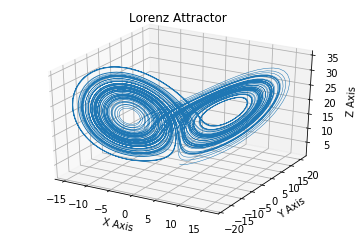

In [108]:
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=20, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_title("Lorenz Attractor")

plt.show()

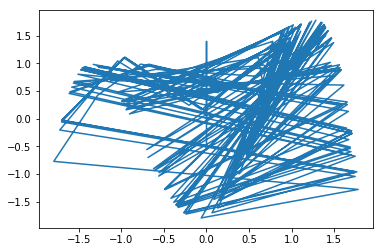

In [113]:
import math
dp2 = {}
a, b = 1.4, 0.3
x0 = (1-b)/2
x1 = x0

def henon(x):    
    if x in dp:
        return dp[x]
    if x == 0:
        dp[0] = x0
        return x0;
    if x == 1:
        dp[1] = x1
        return x1;
    if not x-1 in dp:
        dp[x-1]=henon(x-1)
    if not x-2 in dp:
        dp[x-2]=henon(x-2)
    dp[x] = a - math.pow(dp[x-1],2) + b*dp[x-2]
    return dp[x]

num_steps = 1200

s = []
for i in range(num_steps):
    s.append(henon(i))


plt.plot(s[0:len(s)-2],s[2:])
plt.show()

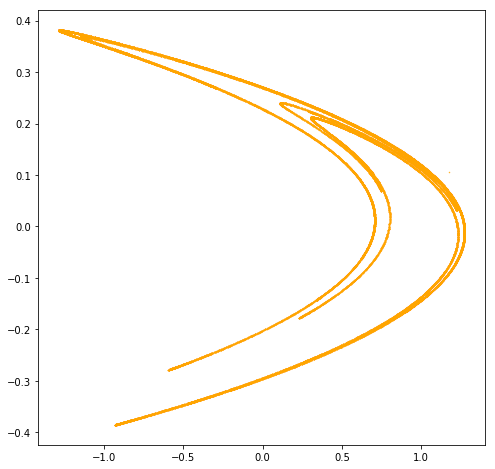

In [106]:
from random import randint, random

# parameters
a = 1.4
b = 0.3

# Hénon map

def henon(X):
    x, y = X
    xnew = 1-a*x*x+y
    ynew = b*x
    return xnew, ynew

X0 = [(1-b)/2, (1-b)/2]

X, Y = [], []
for i in range(40000):
    xnew, ynew = henon(X0)
    X, Y = X + [xnew], Y + [ynew]
    X0 = [xnew, ynew]

# figure
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, Y, color='orange', s=0.2)
plt.show()